## GRUPO 

* NOME : Higor Vinicios Carrião RA : 1903471
* NOME : Pamella Oliveira RA : 2101539

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/heart.csv') 

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# Entendimento do negocio e dos dados

* Quais são os dados?

In [ ]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Age: idade do paciente [anos]

Sex: sexo do paciente [M: Masculino, F: Feminino]

ChestPainType: tipo de dor no peito [TA: Típico Angina, ATA: Angina atípica, NAP: Dor Não-Anginal, ASY: Assintomática]

RestingBP: pressão arterial de repouso [mm Hg]

Cholesterol: colesterol sérico [mm/dl]

FastingBS: açúcar no sangue em jejum [1: se o Jejum de > 120 mg/dl, 0: caso contrário]

RestingECG: resultados de eletrocardiograma em repouso [Normal: Normal, ST: ter anormalidade de onda ST-T (inversões de onda T e/ou elevação de ST ou depressão de > 0,05 mV), LVH: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes]

MaxHR: frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]

ExerciseAngina: angina induzida por exercícios [Y: Sim, N: Não]

Oldpeak: oldpeak = ST [Valor numérico medido na depressão]

ST_Slope: a inclinação do segmento ST de exercício de pico [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: aula de saída [1: doença cardíaca, 0: Normal]

* Qual o Alvo?

HeartDisease

In [ ]:
df.shape

(918, 12)

# Preparação dos Dados

In [ ]:
df = df.rename(columns={'Age' : 'idade', 'Sex' : 'sexo', 'ChestPainType' : 'tipo_dor', 'RestingBP' : 'pressão_arterial_repouso', 'Cholesterol' : 'colesterol', 'FastingBS' : 'acuçar_em_jejum',
       'RestingECG' : 'eletrocardiograma', 'MaxHR' : 'frequencia_cardiaca_max', 'ExerciseAngina' : 'angina_exercicio', 'Oldpeak' : 'velocidade_esteira', 'ST_Slope' : 'inclinação_esteira',
       'HeartDisease' : 'ALVO'})

In [ ]:
df['idade'].max()

77

In [ ]:
df['idade'].min()

28

## Idade

In [ ]:
df['PRE_IDADE'] = [(x-28)/(77-28) for x in df['idade']]

## Sexo

In [ ]:
df['PRE_SEXO_M'] = [1 if x == 'M' else 0 for x in df['sexo']]
df['PRE_SEXO_F'] = [1 if x == 'F' else 0 for x in df['sexo']]

## Tipo de Dor

In [ ]:
df['PRE_TIPO_DOR_ATA'] = [1 if x == 'ATA' else 0 for x in df['tipo_dor']]
df['PRE_TIPO_DOR_NAP'] = [1 if x == 'NAP' else 0 for x in df['tipo_dor']]
df['PRE_TIPO_DOR_ASY'] = [1 if x == 'ASY' else 0 for x in df['tipo_dor']]
df['PRE_TIPO_DOR_TA'] = [1 if x == 'TA' else 0 for x in df['tipo_dor']]

## pressão_arterial_repouso

In [ ]:
df['PRE_PRESSÃO_ARTERIAL_REPOUSO'] = [(x-0)/(200-0) for x in df['pressão_arterial_repouso']]

## COLESTEROL

In [ ]:
df['PRE_COLESTEROL'] = [(x-0)/(603-0) for x in df['colesterol']]

In [ ]:
df['PRE_COLESTEROL'].min()

0.0

In [ ]:
df['PRE_COLESTEROL'].max()

1.0

## ELETROCARDIOGRAMA

In [ ]:
df['PRE_ELETROCARDIOGRAMA_NORMAL'] = [1 if x == 'Normal' else 0 for x in df['eletrocardiograma']]
df['PRE_ELETROCARDIOGRAMA_ST'] = [1 if x == 'ST' else 0 for x in df['eletrocardiograma']]
df['PRE_ELETROCARDIOGRAMA_LVH'] = [1 if x == 'LVH' else 0 for x in df['eletrocardiograma']]

## frequencia_cardiaca_max

In [ ]:
df['frequencia_cardiaca_max'].max()

202

In [ ]:
df['frequencia_cardiaca_max'].min()

60

In [ ]:
df['PRE_FREQUENCIA_CARDIACA_MAX'] = [(x-60)/(202-60) for x in df['frequencia_cardiaca_max']]

## ANGINA EXERCICIO

In [ ]:
df['angina_exercicio'].drop_duplicates()

0    N
3    Y
Name: angina_exercicio, dtype: object

In [ ]:
df['PRE_ANGINA_EXERCICIO_N'] = [1 if x == 'N' else 0 for x in df['angina_exercicio']]
df['PRE_ANGINA_EXERCICIO_Y'] = [1 if x == 'Y' else 0 for x in df['angina_exercicio']]

## VELOCIDADE ESTEIRA

In [ ]:
df['velocidade_esteira'].max()

6.2

In [ ]:
df['velocidade_esteira'].min()

-2.6

In [ ]:
df['PRE_VELOCIDADE_ESTEIRA'] = [0 if x < 0 else x for x in df['velocidade_esteira']]

In [ ]:
df['PRE_VELOCIDADE_ESTEIRA'] = [(x-0)/(6.2-0) for x in df['PRE_VELOCIDADE_ESTEIRA']]

## INCLINAÇÃO ESTEIRA

> Bloco com recuo



In [ ]:
df['inclinação_esteira'].drop_duplicates()

0        Up
1      Flat
247    Down
Name: inclinação_esteira, dtype: object

In [ ]:
df['PRE_INCLINACAO_ESTEIRA_UP'] = [1 if x == 'Up' else 0 for x in df['inclinação_esteira']]
df['PRE_INCLINACAO_ESTEIRA_FLAT'] = [1 if x == 'Flat' else 0 for x in df['inclinação_esteira']]
df['PRE_INCLINACAO_ESTEIRA_DOWN'] = [1 if x == 'Down' else 0 for x in df['inclinação_esteira']]

## Separar Treio e Teste

In [ ]:
cols_in = [
    'PRE_IDADE',
    'PRE_SEXO_M',
    'PRE_SEXO_F',
    'PRE_TIPO_DOR_ATA',
    'PRE_TIPO_DOR_NAP',
    'PRE_TIPO_DOR_ASY',
    'PRE_TIPO_DOR_TA',
    'PRE_PRESSÃO_ARTERIAL_REPOUSO',
    'PRE_COLESTEROL',
    'PRE_ELETROCARDIOGRAMA_NORMAL',
    'PRE_ELETROCARDIOGRAMA_ST',
    'PRE_ELETROCARDIOGRAMA_LVH',
    'PRE_FREQUENCIA_CARDIACA_MAX',
    'PRE_ANGINA_EXERCICIO_N',
    'PRE_ANGINA_EXERCICIO_Y',
    'PRE_VELOCIDADE_ESTEIRA',
    'PRE_INCLINACAO_ESTEIRA_UP',
    'PRE_INCLINACAO_ESTEIRA_FLAT',
    'PRE_INCLINACAO_ESTEIRA_DOWN',
    'ALVO'
]

In [ ]:
X = df[['PRE_IDADE',
    'PRE_SEXO_M',
    'PRE_SEXO_F',
    'PRE_TIPO_DOR_ATA',
    'PRE_TIPO_DOR_NAP',
    'PRE_TIPO_DOR_ASY',
    'PRE_TIPO_DOR_TA',
    'PRE_PRESSÃO_ARTERIAL_REPOUSO',
    'PRE_COLESTEROL',
    'PRE_ELETROCARDIOGRAMA_NORMAL',
    'PRE_ELETROCARDIOGRAMA_ST',
    'PRE_ELETROCARDIOGRAMA_LVH',
    'PRE_FREQUENCIA_CARDIACA_MAX',
    'PRE_ANGINA_EXERCICIO_N',
    'PRE_ANGINA_EXERCICIO_Y',
    'PRE_VELOCIDADE_ESTEIRA',
    'PRE_INCLINACAO_ESTEIRA_UP',
    'PRE_INCLINACAO_ESTEIRA_FLAT',
    'PRE_INCLINACAO_ESTEIRA_DOWN',]]

In [ ]:
y = df['ALVO']

#MODELAGEM

## MODELAGEM 1

In [ ]:
# Base de dados
# Datset
import torch
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [ ]:
# transformar em numpy para Dataset
X, y = np.array(X), np.array(y)

# criar dataset
dataset = CustomDataset(torch.from_numpy(X).float(), torch.from_numpy(y).float())
dataset

In [ ]:
r = torch.from_numpy(y).float()
r.unsqueeze(1)

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
      

In [ ]:
# Amostra balanceada no lote
from collections import Counter
from torch.utils.data.sampler import WeightedRandomSampler

contador=Counter(y)

pesos_classes=1./np.array([contador[0],contador[1]])

pesos_amostra = np.array([pesos_classes[int(t)] for t in y])
pesos_amostra=torch.from_numpy(pesos_amostra)
amostra = WeightedRandomSampler(pesos_amostra, len(pesos_amostra))
amostra

In [ ]:
# Hiperparâmetros
TAXA_APRENDIZADO = 0.01
BATCH = 16
EPOCAS = 200

In [ ]:
# Carregar Dataset
dataset_loader = DataLoader(
    dataset=dataset,
    batch_size=BATCH,
    sampler=amostra
)

In [ ]:
#Rede neural
import torch
from torch import nn
class MLP(nn.Module):
    def __init__(self, n_attrs):
        super(MLP, self).__init__()

        # Sequencia de tarefas da rede
        self.mlp_stack = nn.Sequential(            
            nn.Linear(n_attrs, 32), # primiera camada - aplicar transformação de linear. n características e 7 neurônios          
            nn.ReLU(),  # ativar saída - transformar entre 0 e x            
            nn.Linear(32, 8), # segunda camada - aplicar transformação de linear. 5 neurônios
            nn.ReLU(), # ativar saída - transformar entre 0 e x
            nn.Linear(8, 4), # segunda camada - aplicar transformação de linear. 5 neurônios
            nn.ReLU(), # ativar saída - transformar entre 0 e x
            nn.Linear(4, 1),  # terceira camada - aplicar transformação de linear. 2 neurônios (2 categorias)
            nn.Sigmoid() # ativação da rede - Sigmoid - saída entre 0 e 1
        )

    def forward(self, x):
        y = self.mlp_stack(x)
        return y

In [ ]:
# verificar gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')
# inicialização do modelo
model = MLP(n_attrs=len(X[0]))
model.to(device)

Using cpu device


MLP(
  (mlp_stack): Sequential(
    (0): Linear(in_features=19, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
    (5): ReLU()
    (6): Linear(in_features=4, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
# Treinamento
custo_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=TAXA_APRENDIZADO)

# treinamento na rede neural
from sklearn.metrics import accuracy_score

valores_custo = []
valores_acuracia = []

for t in range(EPOCAS):
  custo_epoca = 0
  acuracia_epoca = 0

  print(f"\n-------------------------------\nÉpoca {t+1}")
  n = len(dataset_loader.dataset) # quantidade de registros

  #configurar modelo para treinamento
  model.train()
  # dividir o conjunto de treinamento em lotes (batches)
  for batch, (X_batch, y_batch) in enumerate(dataset_loader):

    # usar GPU
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)

    # fazer predição com modelo
    y_pred = model(X_batch)

    # calcular erro    
    custo = custo_fn(y_pred, y_batch.unsqueeze(1))

    # Backpropagation
    optimizer.zero_grad() # reiniciar gradiente
    custo.backward() # retropropagar o erro
    optimizer.step() # recalcular pesos
   
    custo_epoca +=  custo.item()

    # acuracia
    # y_pred tem uma saída para cada categoria (2 neurônios). 
    # 0: categoria 0
    # 1: categoria 1
    acuracia_epoca += accuracy_score(y_batch.cpu(), torch.round(y_pred).detach().cpu()) # .cpu() remove o uso da GPU
  
  valores_custo.append(custo_epoca/len(dataset_loader))
  valores_acuracia.append(acuracia_epoca/len(dataset_loader))
  print(f"custo: {valores_custo[-1]:>5.4f}\t|\tacurácia: {valores_acuracia[-1]:>5.4f}")


-------------------------------
Época 1
custo: 0.6926	|	acurácia: 0.5154

-------------------------------
Época 2
custo: 0.6941	|	acurácia: 0.4691

-------------------------------
Época 3
custo: 0.6921	|	acurácia: 0.5025

-------------------------------
Época 4
custo: 0.6912	|	acurácia: 0.5374

-------------------------------
Época 5
custo: 0.6895	|	acurácia: 0.6710

-------------------------------
Época 6
custo: 0.6883	|	acurácia: 0.6078

-------------------------------
Época 7
custo: 0.6878	|	acurácia: 0.7263

-------------------------------
Época 8
custo: 0.6869	|	acurácia: 0.7414

-------------------------------
Época 9
custo: 0.6850	|	acurácia: 0.7611

-------------------------------
Época 10
custo: 0.6826	|	acurácia: 0.7216

-------------------------------
Época 11
custo: 0.6812	|	acurácia: 0.7313

-------------------------------
Época 12
custo: 0.6793	|	acurácia: 0.7514

-------------------------------
Época 13
custo: 0.6749	|	acurácia: 0.7963

-------------------------------
É

Text(0.5, 1.0, 'Acurácia treinamento/Época')

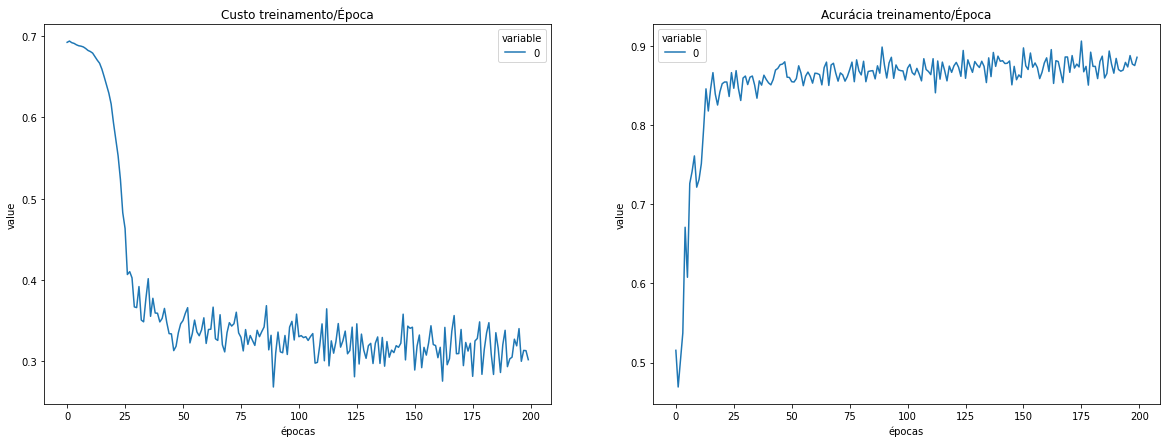

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
custo_df = pd.DataFrame(valores_custo).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})
acuracia_df = pd.DataFrame(valores_acuracia).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))


sns.lineplot(data=custo_df, x = "épocas", y="value", hue="variable", ax=axes[0]).set_title('Custo treinamento/Época')
sns.lineplot(data=acuracia_df, x = "épocas", y="value", hue="variable", ax=axes[1]).set_title('Acurácia treinamento/Época')

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=88)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=88)


In [ ]:
train_dataset = CustomDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = CustomDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = CustomDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [ ]:
# Amostra balanceada no lote
from collections import Counter
from torch.utils.data.sampler import WeightedRandomSampler

contador=Counter(y_train)

pesos_classes=1./np.array([contador[0],contador[1]])

pesos_amostra = np.array([pesos_classes[int(t)] for t in y_train])
pesos_amostra=torch.from_numpy(pesos_amostra)
amostra = WeightedRandomSampler(pesos_amostra, len(pesos_amostra))

In [ ]:
train_loader = DataLoader(dataset=train_dataset,  batch_size=BATCH, sampler=amostra)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')
# inicialização do modelo
model = MLP(n_attrs=len(X[0]))
model.to(device)

custo_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=TAXA_APRENDIZADO)

Using cpu device


In [ ]:
valores_custo = {
    "treinamento": [],
    "validacao": []
}

valores_acuracia = {
    "treinamento": [],
    "validacao": []
}

for t in range(EPOCAS):
  
  print(f"\n-------------------------------\nÉpoca {t+1}")
  n = len(train_loader.dataset) # quantidade de registros

  custo_epoca_train = 0
  acuracia_epoca_train = 0
  # treinamento
  model.train()
  # dividir o conjunto de treinamento em lotes (batches)
  for batch, (X_train_batch, y_train_batch) in enumerate(train_loader):
    
    # usar GPU
    X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)

    # fazer predição com modelo
    y_train_pred = model(X_train_batch)

    # calcular erro    
    custo = custo_fn(y_train_pred, y_train_batch.unsqueeze(1))

    # Backpropagation
    optimizer.zero_grad() # reiniciar gradiente
    custo.backward() # retropropagar o erro
    optimizer.step() # recalcular pesos
   
    custo_epoca_train +=  custo.item()

    # acuracia
    #_, y_pred_tags_train = torch.max(y_train_pred, dim = 1)
    acuracia_epoca_train += accuracy_score(y_train_batch.cpu(), torch.round(y_train_pred).detach().cpu())
  
  # validacao

  with torch.no_grad():
        
    custo_epoca_val = 0
    acuracia_epoca_val = 0

    # configural modelo para validacao
    model.eval()
    for X_val_batch, y_val_batch in val_loader:     

      # usar GPU
      X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

      y_val_pred = model(X_val_batch)
                  
      custo_val = custo_fn(y_val_pred, y_val_batch.unsqueeze(1))
      
      custo_epoca_val += custo_val.item()

      # acuracia
      #_, y_pred_tags_val = torch.max(y_val_pred, dim = 1)
      acuracia_epoca_val += accuracy_score(y_val_batch.cpu(), torch.round(y_val_pred).detach().cpu())
  
  valores_custo['treinamento'].append(custo_epoca_train/len(train_loader))
  valores_custo['validacao'].append(custo_epoca_val/len(val_loader))

  valores_acuracia['treinamento'].append(acuracia_epoca_train/len(train_loader))
  valores_acuracia['validacao'].append(acuracia_epoca_val/len(val_loader))
  print('Treinamento')
  print(f"custo: {valores_custo['treinamento'][-1]:>5.4f}\t|\tacurácia: {valores_acuracia['treinamento'][-1]:>5.4f}")
  print('Validação')
  print(f"custo: {valores_custo['validacao'][-1]:>5.4f}\t|\tacurácia: {valores_acuracia['validacao'][-1]:>5.4f}")
  


-------------------------------
Época 1
Treinamento
custo: 0.7223	|	acurácia: 0.4881
Validação
custo: 0.7342	|	acurácia: 0.4459

-------------------------------
Época 2
Treinamento
custo: 0.7148	|	acurácia: 0.4896
Validação
custo: 0.7242	|	acurácia: 0.4459

-------------------------------
Época 3
Treinamento
custo: 0.7096	|	acurácia: 0.4836
Validação
custo: 0.7148	|	acurácia: 0.4459

-------------------------------
Época 4
Treinamento
custo: 0.7049	|	acurácia: 0.4762
Validação
custo: 0.7066	|	acurácia: 0.4459

-------------------------------
Época 5
Treinamento
custo: 0.6964	|	acurácia: 0.4926
Validação
custo: 0.7013	|	acurácia: 0.4459

-------------------------------
Época 6
Treinamento
custo: 0.6917	|	acurácia: 0.5074
Validação
custo: 0.6980	|	acurácia: 0.4459

-------------------------------
Época 7
Treinamento
custo: 0.6880	|	acurácia: 0.5208
Validação
custo: 0.6955	|	acurácia: 0.4459

-------------------------------
Época 8
Treinamento
custo: 0.6865	|	acurácia: 0.5179
Validação
c

Text(0.5, 1.0, 'Acurácia treinamento/Época')

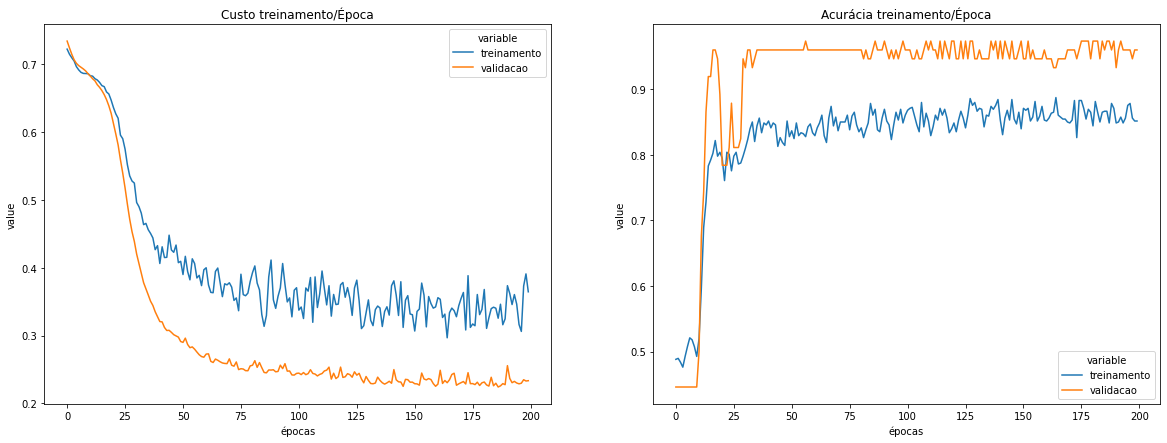

In [ ]:
custo_df = pd.DataFrame.from_dict(valores_custo).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})
acuracia_df = pd.DataFrame.from_dict(valores_acuracia).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.lineplot(data=custo_df, x = "épocas", y="value", hue="variable", ax=axes[0]).set_title('Custo treinamento/Época')
sns.lineplot(data=acuracia_df, x = "épocas", y="value", hue="variable", ax=axes[1]).set_title('Acurácia treinamento/Época')

In [ ]:
y_pred = []
with torch.no_grad():
  model.eval()
  for X_batch, _ in test_loader:
    X_batch = X_batch.to(device)
    y_test_pred = model(X_batch)
    #_, y_pred_tags = torch.max(y_test_pred, dim = 1)
    y_pred.append(torch.round(y_test_pred).cpu().numpy())
y_pred = [a.squeeze().tolist() for a in y_pred]


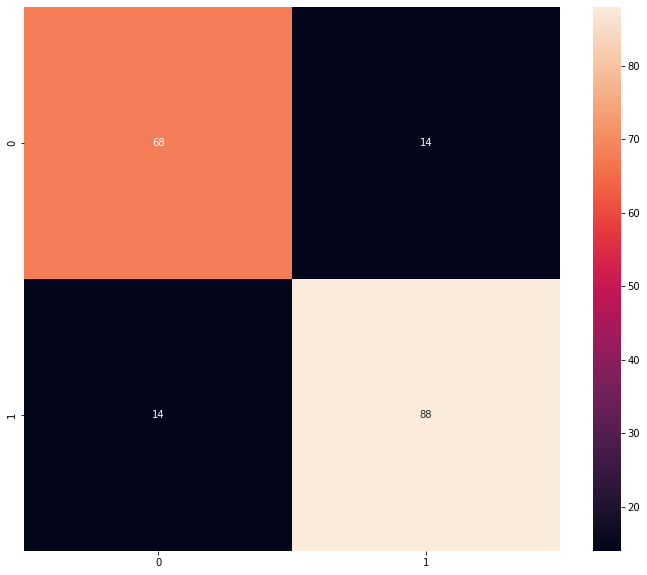

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.subplots(figsize=(12,10))
sns.heatmap(confusion_matrix_df, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        82
           1       0.86      0.86      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## MODELAGEM 2

In [ ]:
# Hiperparâmetros
TAXA_APRENDIZADO = 0.01
BATCH = 16
EPOCAS = 200

In [ ]:
# Carregar Dataset
dataset_loader = DataLoader(
    dataset=dataset,
    batch_size=BATCH,
    sampler=amostra
)

In [ ]:
#Rede neural
import torch
from torch import nn
class MLP(nn.Module):
    def __init__(self, n_attrs):
        super(MLP, self).__init__()

        # Sequencia de tarefas da rede
        self.mlp_stack = nn.Sequential(            
            nn.Linear(n_attrs, 32), # primiera camada - aplicar transformação de linear. n características e 7 neurônios          
            nn.ReLU(),  # ativar saída - transformar entre 0 e x            
            nn.Linear(32, 16), # segunda camada - aplicar transformação de linear. 5 neurônios
            nn.ReLU(), # ativar saída - transformar entre 0 e x
            nn.Linear(16, 1),  # terceira camada - aplicar transformação de linear. 2 neurônios (2 categorias)
            nn.Sigmoid() # ativação da rede - Sigmoid - saída entre 0 e 1
        )

    def forward(self, x):
        y = self.mlp_stack(x)
        return y

In [ ]:
# verificar gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')
# inicialização do modelo
model = MLP(n_attrs=len(X[0]))
model.to(device)

Using cpu device


MLP(
  (mlp_stack): Sequential(
    (0): Linear(in_features=19, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
# Treinamento
custo_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=TAXA_APRENDIZADO)

# treinamento na rede neural
from sklearn.metrics import accuracy_score

valores_custo = []
valores_acuracia = []

for t in range(EPOCAS):
  custo_epoca = 0
  acuracia_epoca = 0

  print(f"\n-------------------------------\nÉpoca {t+1}")
  n = len(dataset_loader.dataset) # quantidade de registros

  #configurar modelo para treinamento
  model.train()
  # dividir o conjunto de treinamento em lotes (batches)
  for batch, (X_batch, y_batch) in enumerate(dataset_loader):

    # usar GPU
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)

    # fazer predição com modelo
    y_pred = model(X_batch)

    # calcular erro    
    custo = custo_fn(y_pred, y_batch.unsqueeze(1))

    # Backpropagation
    optimizer.zero_grad() # reiniciar gradiente
    custo.backward() # retropropagar o erro
    optimizer.step() # recalcular pesos
   
    custo_epoca +=  custo.item()

    # acuracia
    # y_pred tem uma saída para cada categoria (2 neurônios). 
    # 0: categoria 0
    # 1: categoria 1
    acuracia_epoca += accuracy_score(y_batch.cpu(), torch.round(y_pred).detach().cpu()) # .cpu() remove o uso da GPU
  
  valores_custo.append(custo_epoca/len(dataset_loader))
  valores_acuracia.append(acuracia_epoca/len(dataset_loader))
  print(f"custo: {valores_custo[-1]:>5.4f}\t|\tacurácia: {valores_acuracia[-1]:>5.4f}")


-------------------------------
Época 1
custo: 0.6846	|	acurácia: 0.6354

-------------------------------
Época 2
custo: 0.6728	|	acurácia: 0.5759

-------------------------------
Época 3
custo: 0.6602	|	acurácia: 0.5938

-------------------------------
Época 4
custo: 0.6490	|	acurácia: 0.5952

-------------------------------
Época 5
custo: 0.6352	|	acurácia: 0.5952

-------------------------------
Época 6
custo: 0.6251	|	acurácia: 0.5982

-------------------------------
Época 7
custo: 0.6149	|	acurácia: 0.5908

-------------------------------
Época 8
custo: 0.6049	|	acurácia: 0.5714

-------------------------------
Época 9
custo: 0.5881	|	acurácia: 0.5952

-------------------------------
Época 10
custo: 0.5748	|	acurácia: 0.6131

-------------------------------
Época 11
custo: 0.5362	|	acurácia: 0.6890

-------------------------------
Época 12
custo: 0.5323	|	acurácia: 0.7336

-------------------------------
Época 13
custo: 0.4994	|	acurácia: 0.8036

-------------------------------
É

Text(0.5, 1.0, 'Acurácia treinamento/Época')

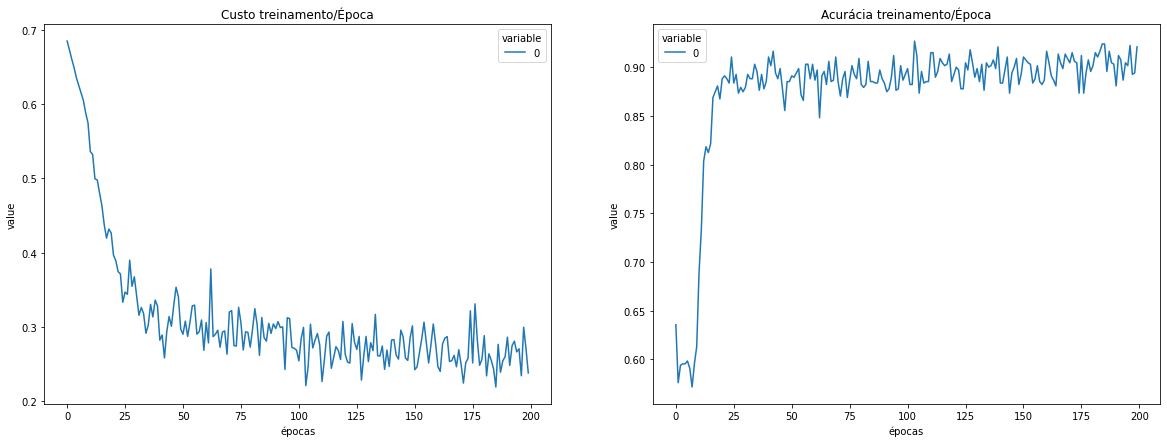

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
custo_df = pd.DataFrame(valores_custo).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})
acuracia_df = pd.DataFrame(valores_acuracia).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))


sns.lineplot(data=custo_df, x = "épocas", y="value", hue="variable", ax=axes[0]).set_title('Custo treinamento/Época')
sns.lineplot(data=acuracia_df, x = "épocas", y="value", hue="variable", ax=axes[1]).set_title('Acurácia treinamento/Época')

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=88)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=88)


In [ ]:
train_dataset = CustomDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = CustomDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = CustomDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [ ]:
# Amostra balanceada no lote
from collections import Counter
from torch.utils.data.sampler import WeightedRandomSampler

contador=Counter(y_train)

pesos_classes=1./np.array([contador[0],contador[1]])

pesos_amostra = np.array([pesos_classes[int(t)] for t in y_train])
pesos_amostra=torch.from_numpy(pesos_amostra)
amostra = WeightedRandomSampler(pesos_amostra, len(pesos_amostra))

In [ ]:
train_loader = DataLoader(dataset=train_dataset,  batch_size=BATCH, sampler=amostra)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')
# inicialização do modelo
model = MLP(n_attrs=len(X[0]))
model.to(device)

custo_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=TAXA_APRENDIZADO)

Using cpu device


In [ ]:
valores_custo = {
    "treinamento": [],
    "validacao": []
}

valores_acuracia = {
    "treinamento": [],
    "validacao": []
}

for t in range(EPOCAS):
  
  print(f"\n-------------------------------\nÉpoca {t+1}")
  n = len(train_loader.dataset) # quantidade de registros

  custo_epoca_train = 0
  acuracia_epoca_train = 0
  # treinamento
  model.train()
  # dividir o conjunto de treinamento em lotes (batches)
  for batch, (X_train_batch, y_train_batch) in enumerate(train_loader):
    
    # usar GPU
    X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)

    # fazer predição com modelo
    y_train_pred = model(X_train_batch)

    # calcular erro    
    custo = custo_fn(y_train_pred, y_train_batch.unsqueeze(1))

    # Backpropagation
    optimizer.zero_grad() # reiniciar gradiente
    custo.backward() # retropropagar o erro
    optimizer.step() # recalcular pesos
   
    custo_epoca_train +=  custo.item()

    # acuracia
    #_, y_pred_tags_train = torch.max(y_train_pred, dim = 1)
    acuracia_epoca_train += accuracy_score(y_train_batch.cpu(), torch.round(y_train_pred).detach().cpu())
  
  # validacao

  with torch.no_grad():
        
    custo_epoca_val = 0
    acuracia_epoca_val = 0

    # configural modelo para validacao
    model.eval()
    for X_val_batch, y_val_batch in val_loader:     

      # usar GPU
      X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

      y_val_pred = model(X_val_batch)
                  
      custo_val = custo_fn(y_val_pred, y_val_batch.unsqueeze(1))
      
      custo_epoca_val += custo_val.item()

      # acuracia
      #_, y_pred_tags_val = torch.max(y_val_pred, dim = 1)
      acuracia_epoca_val += accuracy_score(y_val_batch.cpu(), torch.round(y_val_pred).detach().cpu())
  
  valores_custo['treinamento'].append(custo_epoca_train/len(train_loader))
  valores_custo['validacao'].append(custo_epoca_val/len(val_loader))

  valores_acuracia['treinamento'].append(acuracia_epoca_train/len(train_loader))
  valores_acuracia['validacao'].append(acuracia_epoca_val/len(val_loader))
  print('Treinamento')
  print(f"custo: {valores_custo['treinamento'][-1]:>5.4f}\t|\tacurácia: {valores_acuracia['treinamento'][-1]:>5.4f}")
  print('Validação')
  print(f"custo: {valores_custo['validacao'][-1]:>5.4f}\t|\tacurácia: {valores_acuracia['validacao'][-1]:>5.4f}")
  


-------------------------------
Época 1
Treinamento
custo: 0.6988	|	acurácia: 0.4911
Validação
custo: 0.7019	|	acurácia: 0.4459

-------------------------------
Época 2
Treinamento
custo: 0.6876	|	acurácia: 0.5074
Validação
custo: 0.6931	|	acurácia: 0.4459

-------------------------------
Época 3
Treinamento
custo: 0.6868	|	acurácia: 0.4866
Validação
custo: 0.6840	|	acurácia: 0.4459

-------------------------------
Época 4
Treinamento
custo: 0.6742	|	acurácia: 0.5238
Validação
custo: 0.6782	|	acurácia: 0.4459

-------------------------------
Época 5
Treinamento
custo: 0.6717	|	acurácia: 0.5417
Validação
custo: 0.6715	|	acurácia: 0.5811

-------------------------------
Época 6
Treinamento
custo: 0.6692	|	acurácia: 0.7054
Validação
custo: 0.6611	|	acurácia: 0.8378

-------------------------------
Época 7
Treinamento
custo: 0.6608	|	acurácia: 0.8214
Validação
custo: 0.6528	|	acurácia: 0.8919

-------------------------------
Época 8
Treinamento
custo: 0.6536	|	acurácia: 0.8333
Validação
c

Text(0.5, 1.0, 'Acurácia treinamento/Época')

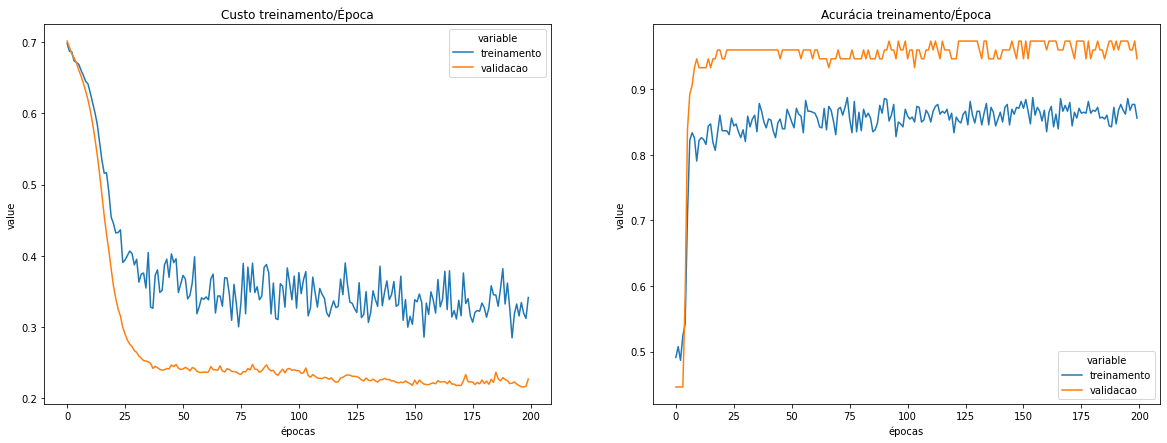

In [ ]:
custo_df = pd.DataFrame.from_dict(valores_custo).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})
acuracia_df = pd.DataFrame.from_dict(valores_acuracia).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.lineplot(data=custo_df, x = "épocas", y="value", hue="variable", ax=axes[0]).set_title('Custo treinamento/Época')
sns.lineplot(data=acuracia_df, x = "épocas", y="value", hue="variable", ax=axes[1]).set_title('Acurácia treinamento/Época')

In [ ]:
y_pred = []
with torch.no_grad():
  model.eval()
  for X_batch, _ in test_loader:
    X_batch = X_batch.to(device)
    y_test_pred = model(X_batch)
    #_, y_pred_tags = torch.max(y_test_pred, dim = 1)
    y_pred.append(torch.round(y_test_pred).cpu().numpy())
y_pred = [a.squeeze().tolist() for a in y_pred]


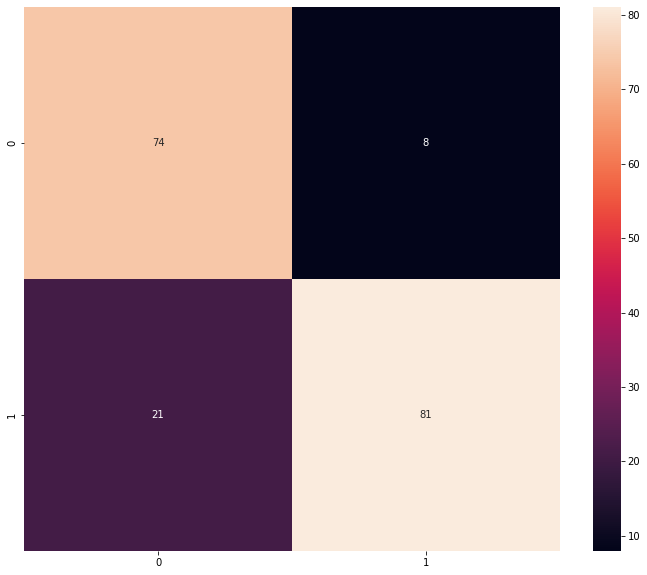

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.subplots(figsize=(12,10))
sns.heatmap(confusion_matrix_df, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        82
           1       0.91      0.79      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



## MODELAGEM 3

In [ ]:
# Hiperparâmetros
TAXA_APRENDIZADO = 0.03
BATCH = 64
EPOCAS = 200

In [ ]:
# Carregar Dataset
dataset_loader = DataLoader(
    dataset=dataset,
    batch_size=BATCH,
    sampler=amostra
)

In [ ]:
#Rede neural
import torch
from torch import nn
class MLP(nn.Module):
    def __init__(self, n_attrs):
        super(MLP, self).__init__()

        # Sequencia de tarefas da rede
        self.mlp_stack = nn.Sequential(            
            nn.Linear(n_attrs, 32), # primiera camada - aplicar transformação de linear. n características e 7 neurônios          
            nn.ReLU(),  # ativar saída - transformar entre 0 e x            
            nn.Linear(32, 16), # segunda camada - aplicar transformação de linear. 5 neurônios
            nn.ReLU(), # ativar saída - transformar entre 0 e x
            nn.Linear(16, 8), # segunda camada - aplicar transformação de linear. 5 neurônios
            nn.ReLU(), # ativar saída - transformar entre 0 e x
            nn.Linear(8, 1),  # terceira camada - aplicar transformação de linear. 2 neurônios (2 categorias)
            nn.Sigmoid() # ativação da rede - Sigmoid - saída entre 0 e 1
        )

    def forward(self, x):
        y = self.mlp_stack(x)
        return y

In [ ]:
# verificar gpu
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')
# inicialização do modelo
model = MLP(n_attrs=len(X[0]))
model.to(device)

Using cpu device


MLP(
  (mlp_stack): Sequential(
    (0): Linear(in_features=19, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

In [ ]:
# Treinamento
custo_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=TAXA_APRENDIZADO)

# treinamento na rede neural
from sklearn.metrics import accuracy_score

valores_custo = []
valores_acuracia = []

for t in range(EPOCAS):
  custo_epoca = 0
  acuracia_epoca = 0

  print(f"\n-------------------------------\nÉpoca {t+1}")
  n = len(dataset_loader.dataset) # quantidade de registros

  #configurar modelo para treinamento
  model.train()
  # dividir o conjunto de treinamento em lotes (batches)
  for batch, (X_batch, y_batch) in enumerate(dataset_loader):

    # usar GPU
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)

    # fazer predição com modelo
    y_pred = model(X_batch)

    # calcular erro    
    custo = custo_fn(y_pred, y_batch.unsqueeze(1))

    # Backpropagation
    optimizer.zero_grad() # reiniciar gradiente
    custo.backward() # retropropagar o erro
    optimizer.step() # recalcular pesos
   
    custo_epoca +=  custo.item()

    # acuracia
    # y_pred tem uma saída para cada categoria (2 neurônios). 
    # 0: categoria 0
    # 1: categoria 1
    acuracia_epoca += accuracy_score(y_batch.cpu(), torch.round(y_pred).detach().cpu()) # .cpu() remove o uso da GPU
  
  valores_custo.append(custo_epoca/len(dataset_loader))
  valores_acuracia.append(acuracia_epoca/len(dataset_loader))
  print(f"custo: {valores_custo[-1]:>5.4f}\t|\tacurácia: {valores_acuracia[-1]:>5.4f}")


-------------------------------
Época 1
custo: 0.6914	|	acurácia: 0.5759

-------------------------------
Época 2
custo: 0.6865	|	acurácia: 0.5974

-------------------------------
Época 3
custo: 0.6866	|	acurácia: 0.5636

-------------------------------
Época 4
custo: 0.6798	|	acurácia: 0.6045

-------------------------------
Época 5
custo: 0.6749	|	acurácia: 0.6125

-------------------------------
Época 6
custo: 0.6779	|	acurácia: 0.5798

-------------------------------
Época 7
custo: 0.6706	|	acurácia: 0.6048

-------------------------------
Época 8
custo: 0.6648	|	acurácia: 0.6156

-------------------------------
Época 9
custo: 0.6677	|	acurácia: 0.5929

-------------------------------
Época 10
custo: 0.6707	|	acurácia: 0.5756

-------------------------------
Época 11
custo: 0.6582	|	acurácia: 0.6116

-------------------------------
Época 12
custo: 0.6637	|	acurácia: 0.5881

-------------------------------
Época 13
custo: 0.6534	|	acurácia: 0.6097

-------------------------------
É

Text(0.5, 1.0, 'Acurácia treinamento/Época')

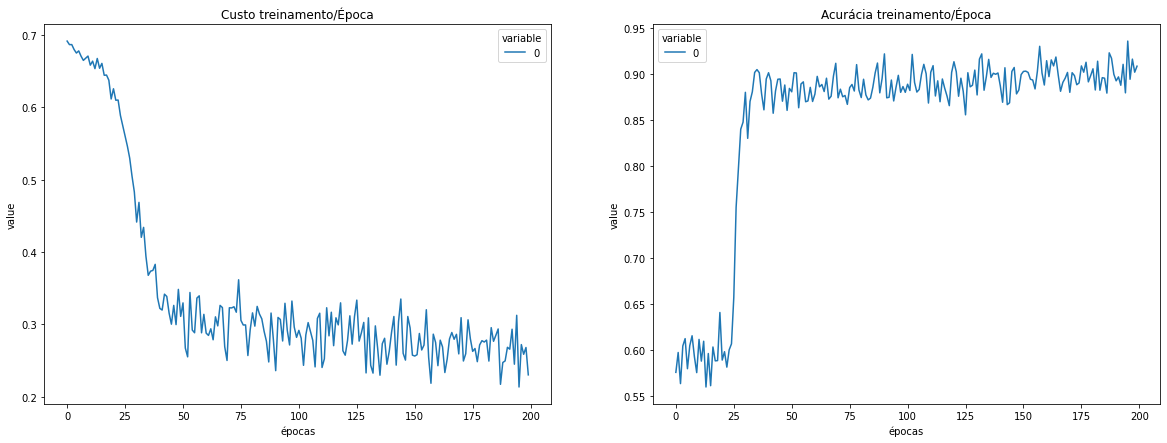

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
custo_df = pd.DataFrame(valores_custo).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})
acuracia_df = pd.DataFrame(valores_acuracia).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))


sns.lineplot(data=custo_df, x = "épocas", y="value", hue="variable", ax=axes[0]).set_title('Custo treinamento/Época')
sns.lineplot(data=acuracia_df, x = "épocas", y="value", hue="variable", ax=axes[1]).set_title('Acurácia treinamento/Época')

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=88)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=88)


In [ ]:
train_dataset = CustomDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = CustomDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = CustomDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [ ]:
# Amostra balanceada no lote
from collections import Counter
from torch.utils.data.sampler import WeightedRandomSampler

contador=Counter(y_train)

pesos_classes=1./np.array([contador[0],contador[1]])

pesos_amostra = np.array([pesos_classes[int(t)] for t in y_train])
pesos_amostra=torch.from_numpy(pesos_amostra)
amostra = WeightedRandomSampler(pesos_amostra, len(pesos_amostra))

In [ ]:
train_loader = DataLoader(dataset=train_dataset,  batch_size=BATCH, sampler=amostra)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')
# inicialização do modelo
model = MLP(n_attrs=len(X[0]))
model.to(device)

custo_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=TAXA_APRENDIZADO)

Using cpu device


In [ ]:
valores_custo = {
    "treinamento": [],
    "validacao": []
}

valores_acuracia = {
    "treinamento": [],
    "validacao": []
}

for t in range(EPOCAS):
  
  print(f"\n-------------------------------\nÉpoca {t+1}")
  n = len(train_loader.dataset) # quantidade de registros

  custo_epoca_train = 0
  acuracia_epoca_train = 0
  # treinamento
  model.train()
  # dividir o conjunto de treinamento em lotes (batches)
  for batch, (X_train_batch, y_train_batch) in enumerate(train_loader):
    
    # usar GPU
    X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)

    # fazer predição com modelo
    y_train_pred = model(X_train_batch)

    # calcular erro    
    custo = custo_fn(y_train_pred, y_train_batch.unsqueeze(1))

    # Backpropagation
    optimizer.zero_grad() # reiniciar gradiente
    custo.backward() # retropropagar o erro
    optimizer.step() # recalcular pesos
   
    custo_epoca_train +=  custo.item()

    # acuracia
    #_, y_pred_tags_train = torch.max(y_train_pred, dim = 1)
    acuracia_epoca_train += accuracy_score(y_train_batch.cpu(), torch.round(y_train_pred).detach().cpu())
  
  # validacao

  with torch.no_grad():
        
    custo_epoca_val = 0
    acuracia_epoca_val = 0

    # configural modelo para validacao
    model.eval()
    for X_val_batch, y_val_batch in val_loader:     

      # usar GPU
      X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

      y_val_pred = model(X_val_batch)
                  
      custo_val = custo_fn(y_val_pred, y_val_batch.unsqueeze(1))
      
      custo_epoca_val += custo_val.item()

      # acuracia
      #_, y_pred_tags_val = torch.max(y_val_pred, dim = 1)
      acuracia_epoca_val += accuracy_score(y_val_batch.cpu(), torch.round(y_val_pred).detach().cpu())
  
  valores_custo['treinamento'].append(custo_epoca_train/len(train_loader))
  valores_custo['validacao'].append(custo_epoca_val/len(val_loader))

  valores_acuracia['treinamento'].append(acuracia_epoca_train/len(train_loader))
  valores_acuracia['validacao'].append(acuracia_epoca_val/len(val_loader))
  print('Treinamento')
  print(f"custo: {valores_custo['treinamento'][-1]:>5.4f}\t|\tacurácia: {valores_acuracia['treinamento'][-1]:>5.4f}")
  print('Validação')
  print(f"custo: {valores_custo['validacao'][-1]:>5.4f}\t|\tacurácia: {valores_acuracia['validacao'][-1]:>5.4f}")
  


-------------------------------
Época 1
Treinamento
custo: 0.6937	|	acurácia: 0.5048
Validação
custo: 0.6891	|	acurácia: 0.5541

-------------------------------
Época 2
Treinamento
custo: 0.6917	|	acurácia: 0.5230
Validação
custo: 0.6890	|	acurácia: 0.5541

-------------------------------
Época 3
Treinamento
custo: 0.6943	|	acurácia: 0.4969
Validação
custo: 0.6892	|	acurácia: 0.5541

-------------------------------
Época 4
Treinamento
custo: 0.6914	|	acurácia: 0.5259
Validação
custo: 0.6890	|	acurácia: 0.5541

-------------------------------
Época 5
Treinamento
custo: 0.6939	|	acurácia: 0.4949
Validação
custo: 0.6892	|	acurácia: 0.5541

-------------------------------
Época 6
Treinamento
custo: 0.6928	|	acurácia: 0.5054
Validação
custo: 0.6893	|	acurácia: 0.5541

-------------------------------
Época 7
Treinamento
custo: 0.6943	|	acurácia: 0.4804
Validação
custo: 0.6897	|	acurácia: 0.5541

-------------------------------
Época 8
Treinamento
custo: 0.6923	|	acurácia: 0.5043
Validação
c

Text(0.5, 1.0, 'Acurácia treinamento/Época')

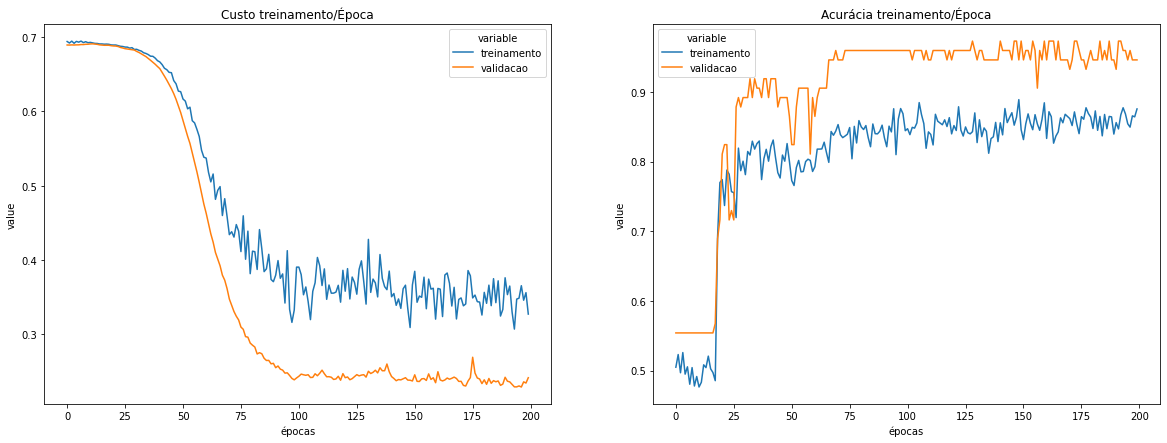

In [ ]:
custo_df = pd.DataFrame.from_dict(valores_custo).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})
acuracia_df = pd.DataFrame.from_dict(valores_acuracia).reset_index().melt(id_vars=['index']).rename(columns={"index":"épocas"})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.lineplot(data=custo_df, x = "épocas", y="value", hue="variable", ax=axes[0]).set_title('Custo treinamento/Época')
sns.lineplot(data=acuracia_df, x = "épocas", y="value", hue="variable", ax=axes[1]).set_title('Acurácia treinamento/Época')

In [ ]:
y_pred = []
with torch.no_grad():
  model.eval()
  for X_batch, _ in test_loader:
    X_batch = X_batch.to(device)
    y_test_pred = model(X_batch)
    #_, y_pred_tags = torch.max(y_test_pred, dim = 1)
    y_pred.append(torch.round(y_test_pred).cpu().numpy())
y_pred = [a.squeeze().tolist() for a in y_pred]


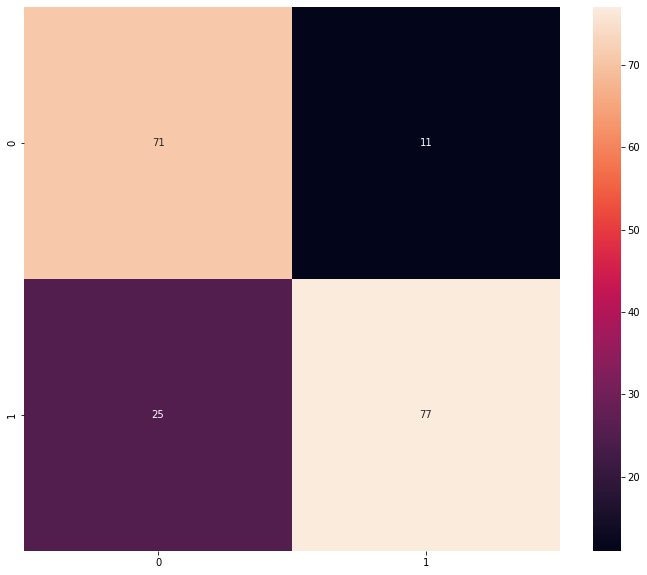

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.subplots(figsize=(12,10))
sns.heatmap(confusion_matrix_df, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        82
           1       0.88      0.75      0.81       102

    accuracy                           0.80       184
   macro avg       0.81      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184



# MELHOR MODELAGEM

* A melhor combinação de hiperparâmetros de acordo com as métricas de avaliação é o primeiro (modelagem 1)